In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('UberDataset.csv')
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
df.shape

(1156, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [7]:
df.drop(index=1155, inplace=True)

In [10]:
df['PURPOSE'].fillna('None', inplace=True)

In [11]:
df['PURPOSE'].isnull().sum()

0

# In which category people do book most of the uber rides?

<Axes: ylabel='count'>

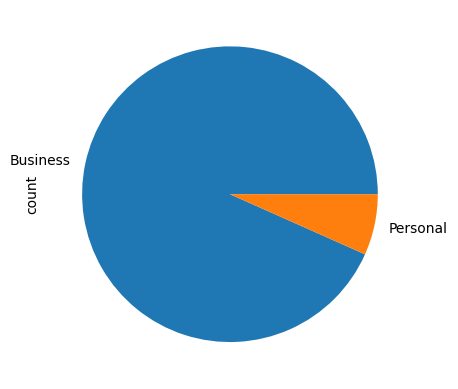

In [18]:
df['CATEGORY'].value_counts().plot(kind='pie')

In [19]:
df['CATEGORY'].value_counts().idxmax()


'Business'

# For which purpose people do book most of the uber rides?

<Axes: xlabel='PURPOSE'>

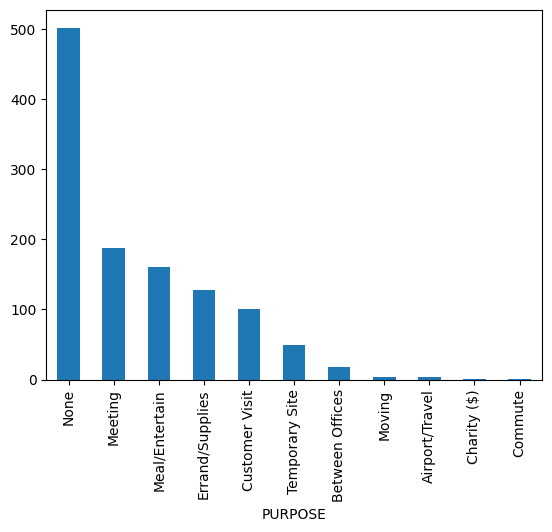

In [21]:
df['PURPOSE'].value_counts().plot(kind='bar')

In [22]:
df['PURPOSE'].value_counts().idxmax()

'None'

# At what time people do book most of the uber rides?

In [27]:
df['START_DATE'] = df['START_DATE'].str.replace('/','-')
df['END_DATE'] = df['END_DATE'].str.replace('/','-')

In [32]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

In [34]:
df['Date'] = pd.DatetimeIndex(df['START_DATE']).date

In [37]:
df['Time(Hour)'] = pd.DatetimeIndex(df['START_DATE']).hour

In [39]:
def get_time_period(hour):
    if 5<= hour < 10:
        return 'Morning'
    elif 10<= hour < 16:
        return 'Afternoon'
    elif 16<= hour < 20:
        return 'Evening'
    else:
        return 'Night'

In [41]:
df['Day-Night'] = df['Time(Hour)'].apply(get_time_period)

<Axes: ylabel='Day-Night'>

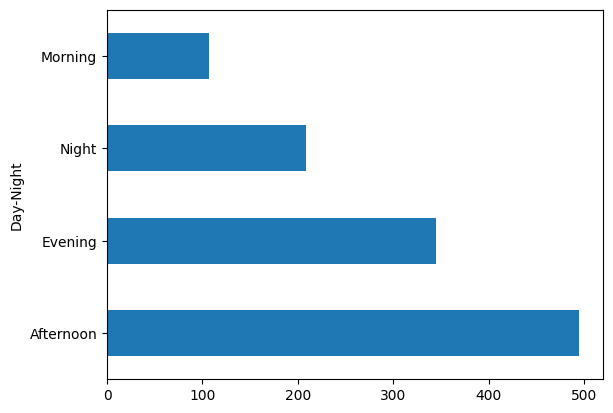

In [44]:
df['Day-Night'].value_counts().plot(kind='barh')

In [45]:
df['Day-Night'].value_counts().idxmax()

'Afternoon'

# In which month people do book uber rides less frequently?

In [ ]:
pd.DatetimeIndex(df['START_DATE']).month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='START_DATE', length=1155)

In [52]:
df['Month'] = df['START_DATE'].dt.strftime('%b')

<Axes: ylabel='Month'>

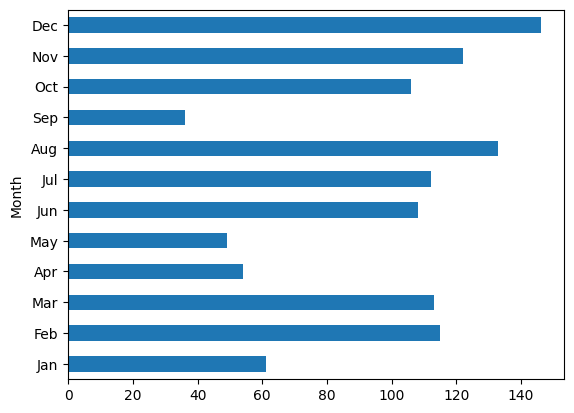

In [60]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'].value_counts().reindex(month_order).plot(kind='barh')

In [61]:
df['Month'].value_counts().idxmax()

'Dec'

In [64]:
df['Month'].value_counts().idxmin()

'Sep'

# Show a chart of total miles rides in each month

In [70]:
df.groupby('Month')['MILES'].sum().reindex(month_order)

Month
Jan     512.9
Feb     908.2
Mar    1693.9
Apr    1113.0
May     363.8
Jun     842.8
Jul    1224.6
Aug    1335.5
Sep     601.8
Oct    1810.0
Nov     816.9
Dec     981.3
Name: MILES, dtype: float64

<Axes: xlabel='Month'>

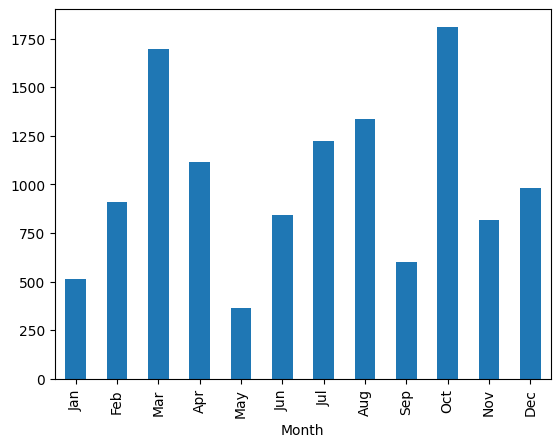

In [72]:
df.groupby('Month')['MILES'].sum().reindex(month_order).plot(kind='bar')

In [75]:
df.groupby('Month')['MILES'].sum().idxmin()

'May'

In [76]:
df.groupby('Month')['MILES'].sum().idxmax()


'Oct'

# On which days of the week people book the most uber rides?


In [78]:
df['Day'] = df['START_DATE'].dt.strftime('%a')

<Axes: ylabel='Day'>

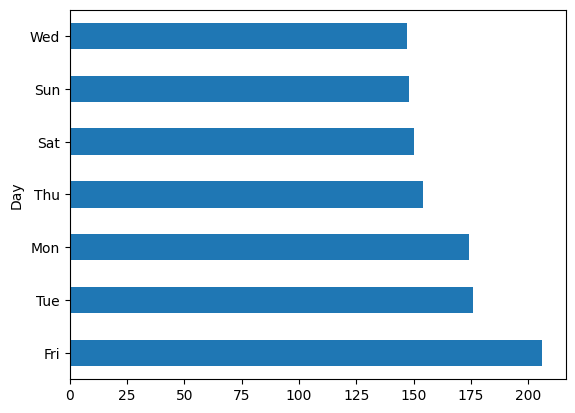

In [81]:
df['Day'].value_counts().plot(kind='barh')

In [82]:
df['Day'].value_counts().idxmax()

'Fri'

In [84]:
df['Day'].value_counts().idxmin()

'Wed'